In [ ]:
pip install seaborn -U

## DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

contract = pd.read_csv('/datasets/final_provider/contract.csv')
clients = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Contract df Preprocessing

In [2]:
display(contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [3]:
contract.rename(columns={"customerID": "customer_id", "BeginDate": "begin_date", "EndDate": "end_date",\
                         "Type":"type", "PaperlessBilling":"paperless_billing", "PaymentMethod":"paperless_billing",\
                        "PaymentMethod":"payment_method","MonthlyCharges":"monthly_charges","TotalCharges":"total_charges"},\
               inplace=True)

contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customer_id          7043 non-null object
begin_date           7043 non-null object
end_date             7043 non-null object
type                 7043 non-null object
paperless_billing    7043 non-null object
payment_method       7043 non-null object
monthly_charges      7043 non-null float64
total_charges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
#Checking for NaNs in contract.
print('contract NaNs:', contract.isna().sum().sum())
#Checking for duplicates in contract.
print('contract duplicates:', contract.duplicated().sum())

contract NaNs: 0
contract duplicates: 0


In [5]:
# Further information on contract df
print('The columns in the dataset contract.csv are:', contract.columns)
print('')
print('The types of the columns in the dataset contract.csv are:')
print(contract.dtypes)
print('')
print('The describe method of the dataset contract.csv is:')
print('')
print(contract.describe())

The columns in the dataset contract.csv are: Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

The types of the columns in the dataset contract.csv are:
customer_id           object
begin_date            object
end_date              object
type                  object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
dtype: object

The describe method of the dataset contract.csv is:

       monthly_charges
count      7043.000000
mean         64.761692
std          30.090047
min          18.250000
25%          35.500000
50%          70.350000
75%          89.850000
max         118.750000


In [6]:
#Changing begin_date type.
contract.begin_date = pd.to_datetime(contract.begin_date)

In [7]:
#Transforming in total_charges column all the empty values (" ") to zeros.
contract.loc[contract.total_charges == " " , 'total_charges'] = 0.00

In [8]:
#Changing total_charges type to floating points.
contract.total_charges = pd.to_numeric(contract.total_charges, downcast='float')
contract.monthly_charges = contract.monthly_charges.astype('float32')

In [9]:
print('total_charges mean', contract.total_charges.mean())
print('total_charges median', contract.total_charges.median())

total_charges mean 2279.7344
total_charges median 1394.55


### Clients df Preprocessing

In [10]:
display(clients)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [11]:
clients.rename(columns={"customerID": "customer_id","SeniorCitizen":"senior_citizen", "Partner":"partner",\
                       "Dependents":"dependents"}, inplace=True)
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customer_id       7043 non-null object
gender            7043 non-null object
senior_citizen    7043 non-null int64
partner           7043 non-null object
dependents        7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
#Checking for NaNs in clients.
print('clients NaNs:', clients.isna().sum().sum())
#Checking for duplicates in clients.
print('clients duplicates:', clients.duplicated().sum())

clients NaNs: 0
clients duplicates: 0


In [13]:
#Analyzing gender column.
print(clients.gender.value_counts())
print()
print(clients.gender.value_counts(normalize=True))

Male      3555
Female    3488
Name: gender, dtype: int64

Male      0.504756
Female    0.495244
Name: gender, dtype: float64


In [14]:
#Analyzing senior_citizen column.
print(clients.senior_citizen.value_counts())
print()
print(clients.senior_citizen.value_counts(normalize=True))

0    5901
1    1142
Name: senior_citizen, dtype: int64

0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64


In [15]:
#Analyzing partner column.
print(clients.partner.value_counts())
print()
print(clients.partner.value_counts(normalize=True))

No     3641
Yes    3402
Name: partner, dtype: int64

No     0.516967
Yes    0.483033
Name: partner, dtype: float64


In [16]:
#Analyzing dependents column.
print(clients.dependents.value_counts())
print()
print(clients.dependents.value_counts(normalize=True))

No     4933
Yes    2110
Name: dependents, dtype: int64

No     0.700412
Yes    0.299588
Name: dependents, dtype: float64


### Internet df preprocessing

In [17]:
display(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [18]:
internet.rename(columns={"customerID": "customer_id", "InternetService":"internet_service","OnlineSecurity":"online_security",\
                        "OnlineBackup":"online_backup","DeviceProtection":"device_protection","TechSupport":"tech_support",\
                        "StreamingTV":"streaming_tv","StreamingMovies":"streaming_movies"}, inplace=True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customer_id          5517 non-null object
internet_service     5517 non-null object
online_security      5517 non-null object
online_backup        5517 non-null object
device_protection    5517 non-null object
tech_support         5517 non-null object
streaming_tv         5517 non-null object
streaming_movies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [19]:
#Checking for NaNs in internet.
print('internet NaNs:', internet.isna().sum().sum())
#Checking for duplicates in internet.
print('internet duplicates:', internet.duplicated().sum())

internet NaNs: 0
internet duplicates: 0


In [20]:
#Analyzing internet_service column.
print(internet.internet_service.value_counts())
print()
print(internet.internet_service.value_counts(normalize=True))

Fiber optic    3096
DSL            2421
Name: internet_service, dtype: int64

Fiber optic    0.561175
DSL            0.438825
Name: internet_service, dtype: float64


In [21]:
#Analyzing online_security column.
print(internet.online_security.value_counts())
print()
print(internet.online_security.value_counts(normalize=True))

No     3498
Yes    2019
Name: online_security, dtype: int64

No     0.63404
Yes    0.36596
Name: online_security, dtype: float64


In [22]:
#Analyzing online_backup column.
print(internet.online_backup.value_counts())
print()
print(internet.online_backup.value_counts(normalize=True))

No     3088
Yes    2429
Name: online_backup, dtype: int64

No     0.559724
Yes    0.440276
Name: online_backup, dtype: float64


In [23]:
#Analyzing device_protection column.
print(internet.device_protection.value_counts())
print()
print(internet.device_protection.value_counts(normalize=True))

No     3095
Yes    2422
Name: device_protection, dtype: int64

No     0.560993
Yes    0.439007
Name: device_protection, dtype: float64


In [24]:
#Analyzing tech_support column.
print(internet.tech_support.value_counts())
print()
print(internet.tech_support.value_counts(normalize=True))

No     3473
Yes    2044
Name: tech_support, dtype: int64

No     0.629509
Yes    0.370491
Name: tech_support, dtype: float64


In [25]:
#Analyzing streaming_tv column.
print(internet.streaming_tv.value_counts())
print()
print(internet.streaming_tv.value_counts(normalize=True))

No     2810
Yes    2707
Name: streaming_tv, dtype: int64

No     0.509335
Yes    0.490665
Name: streaming_tv, dtype: float64


In [26]:
#Analyzing streaming_movies column.
print(internet.streaming_movies.value_counts())
print()
print(internet.streaming_movies.value_counts(normalize=True))

No     2785
Yes    2732
Name: streaming_movies, dtype: int64

No     0.504803
Yes    0.495197
Name: streaming_movies, dtype: float64


### Phone df preprocessing

In [27]:
display(phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [28]:
phone.rename(columns={"customerID": "customer_id", "MultipleLines":"multiple_lines"}, inplace=True)

phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customer_id       6361 non-null object
multiple_lines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


In [29]:
#Checking for NaNs in phone.
print('phone NaNs:', phone.isna().sum().sum())
#Checking for duplicates in internet.
print('phone duplicates:', phone.duplicated().sum())

phone NaNs: 0
phone duplicates: 0


In [30]:
#Analyzing multiple_lines column.
print(phone.multiple_lines.value_counts())
print()
print(phone.multiple_lines.value_counts(normalize=True))

No     3390
Yes    2971
Name: multiple_lines, dtype: int64

No     0.532935
Yes    0.467065
Name: multiple_lines, dtype: float64


### Target preprocessing

In [31]:
#Target analysis.
print(contract.end_date.value_counts())

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64


In [32]:
#Target analysis.
print(contract.end_date.value_counts(normalize=True))

No                     0.734630
2019-11-01 00:00:00    0.068863
2019-12-01 00:00:00    0.066165
2020-01-01 00:00:00    0.065313
2019-10-01 00:00:00    0.065029
Name: end_date, dtype: float64


In [33]:
contract['end_date'] = np.where((contract['end_date'] != 'No'), 'Yes', contract['end_date'])

## DATA VISUALIZATION

In [34]:
sns.set_style('darkgrid')

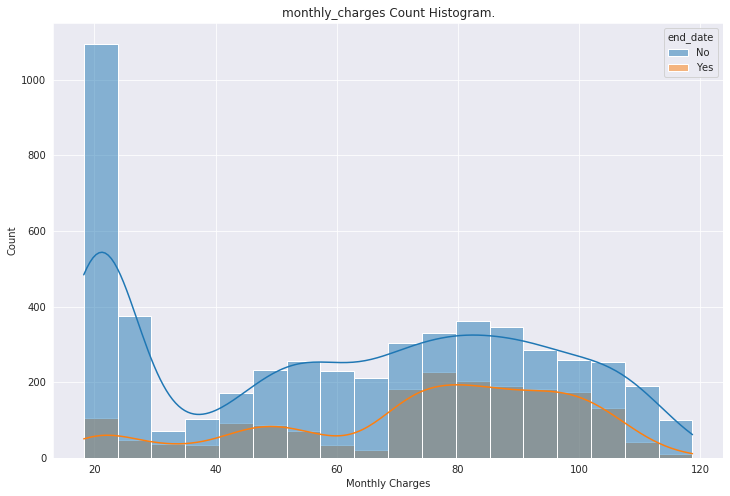

In [35]:
# Monthly Charges visualization.
plt.figure(figsize=(12,8))
sns.histplot(x='monthly_charges', data=contract, kde=True, hue='end_date')
plt.xlabel('Monthly Charges')
plt.title('monthly_charges Count Histogram.')
plt.show()

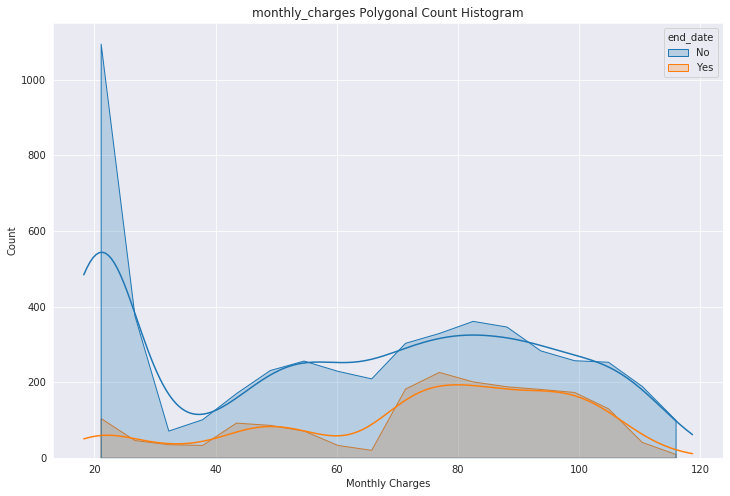

In [36]:
# Monthly Charges visualization.
plt.figure(figsize=(12,8))
sns.histplot(x='monthly_charges', data=contract, kde=True, hue='end_date', element='poly')
plt.xlabel('Monthly Charges')
plt.title('monthly_charges Polygonal Count Histogram')
plt.show()

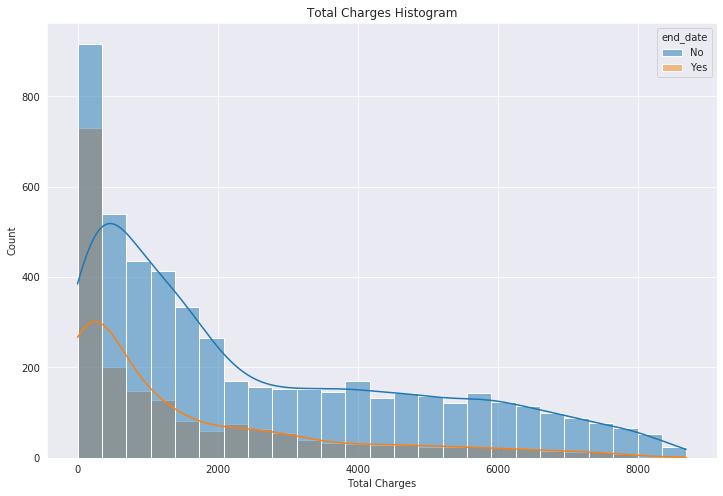

In [37]:
# Total Charges Visualization
plt.figure(figsize=(12,8))
sns.histplot(x='total_charges', data=contract, kde=True, hue='end_date')
plt.xlabel('Total Charges')
plt.title('Total Charges Histogram')
plt.show()

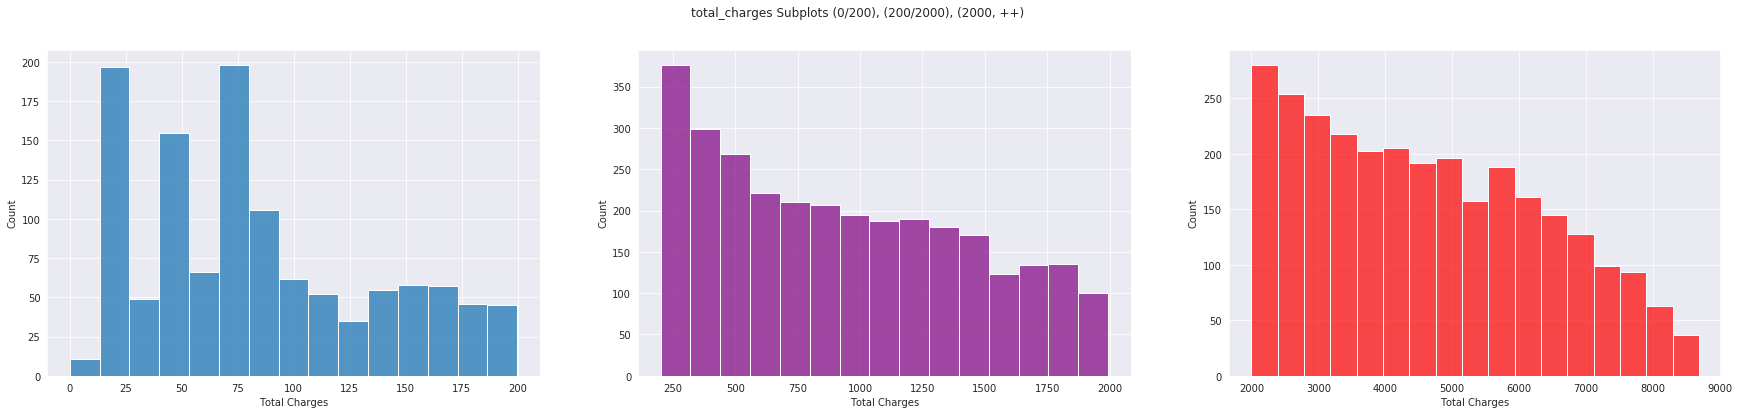

In [38]:
#Dividing the total_charges column in total_charges < 200, btw 200 and 2000 and > 2000 to get a better visualization of graphs.
total_charges_200 = contract.query('total_charges < 200')
total_charges_2000 = contract.query('total_charges > 200 and total_charges < 2000') 
total_charges_over = contract.query('total_charges > 2000')

#Clicking on the subplots expand them.
plt.figure(figsize=(30,6)) # specifying figure size
ax1 = plt.subplot(1,3,1)
sns.histplot(data=total_charges_200, x='total_charges', ax = ax1)
plt.xlabel('Total Charges')
ax2 = plt.subplot(1,3,2)
sns.histplot(data=total_charges_2000, x='total_charges',color = 'purple', ax = ax2, alpha=0.7)
plt.xlabel('Total Charges')
ax3 = plt.subplot(1,3,3)
sns.histplot(data=total_charges_over, x='total_charges', color = 'red', ax = ax3, alpha=0.7)
plt.xlabel('Total Charges')
plt.suptitle('total_charges Subplots (0/200), (200/2000), (2000, ++)')
plt.show()

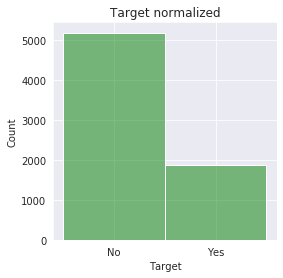


No     0.73463
Yes    0.26537
Name: end_date, dtype: float64


In [39]:
#Visualizing our Target.
plt.figure(figsize=(4,4))
sns.histplot(x='end_date', data=contract, color='green', alpha=.5)
plt.xlabel('Target')
plt.title('Target normalized')
plt.show()
print()
print(contract.end_date.value_counts(normalize=True))

## Client Outflow Research


### While a model for predicting the churn of clientele is in the process of being created, Interconnect's marketing department has started figuring out different ways of retaining clients. You'll need to collect the necessary information to assist them.

- Compare the monthly payment distribution (MonthlyCharges) of all active clients with the clients who have left. Calculate the following statistics for each group: the average, minimum and maximum values, the median, and the values of the 25% and 75% percentiles. Build distribution histograms based on your findings.



In [40]:
#Calculating averages.
print('monthly_charges mean:', contract.monthly_charges.mean())
print()
print('monthly_charges mean grouped by:', contract.groupby('end_date').monthly_charges.mean())

monthly_charges mean: 64.761696

monthly_charges mean grouped by: end_date
No     61.265125
Yes    74.441330
Name: monthly_charges, dtype: float32


In [41]:
#Calculating medians.
print('monthly_charges median:', contract.monthly_charges.median())
print()
print('monthly_charges median grouped by:', contract.groupby('end_date').monthly_charges.median())

monthly_charges median: 70.35

monthly_charges median grouped by: end_date
No     64.425003
Yes    79.650002
Name: monthly_charges, dtype: float32


In [42]:
#Calculating max values.
print('monthly_charges mean:', contract.monthly_charges.max())
print()
print('monthly_charges mean grouped by:', contract.groupby('end_date').monthly_charges.max())

monthly_charges mean: 118.75

monthly_charges mean grouped by: end_date
No     118.750000
Yes    118.349998
Name: monthly_charges, dtype: float32


In [43]:
#Calculating min values.
print('monthly_charges mean:', contract.monthly_charges.min())
print()
print('monthly_charges mean grouped by:', contract.groupby('end_date').monthly_charges.min())

monthly_charges mean: 18.25

monthly_charges mean grouped by: end_date
No     18.25
Yes    18.85
Name: monthly_charges, dtype: float32


In [44]:
#Calculating 25% percentile.
print('monthly_charges 25% percentile:', np.percentile(contract.monthly_charges, 25)) # return 25% percentile
print()
print('monthly_charges 25% percentile of "Yes"', np.percentile(contract[contract.end_date == 'Yes'].monthly_charges, 25))
print('monthly_charges 25% percentile of "No"', np.percentile(contract[contract.end_date == 'No'].monthly_charges, 25))

monthly_charges 25% percentile: 35.5

monthly_charges 25% percentile of "Yes" 56.150001525878906
monthly_charges 25% percentile of "No" 25.100000381469727


In [45]:
#Calculating 75% percentile.
print('monthly_charges 25% percentile:', np.percentile(contract.monthly_charges, 75)) # return 75% percentile
print()
print('monthly_charges 25% percentile of "Yes"', np.percentile(contract[contract.end_date == 'Yes'].monthly_charges, 75))
print('monthly_charges 25% percentile of "No"', np.percentile(contract[contract.end_date == 'No'].monthly_charges, 75))

monthly_charges 25% percentile: 89.8499984741211

monthly_charges 25% percentile of "Yes" 94.19999694824219
monthly_charges 25% percentile of "No" 88.4000015258789


In [46]:
#Checking obtained values
print(contract.monthly_charges.describe())

count    7043.000000
mean       64.761696
std        30.090048
min        18.250000
25%        35.500000
50%        70.349998
75%        89.849998
max       118.750000
Name: monthly_charges, dtype: float64


In [47]:
contract_yes = pd.DataFrame()
contract_no = pd.DataFrame()
contract_yes = contract.query('end_date == "Yes"')
contract_no = contract.query('end_date == "No"')

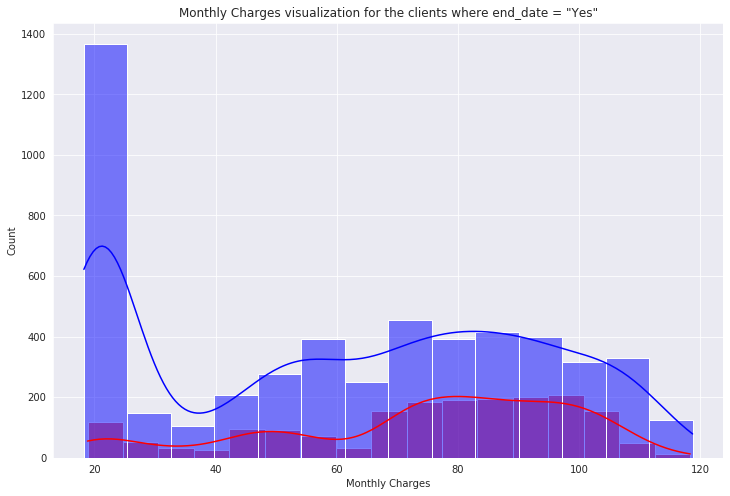

In [61]:
# Monthly Charges visualization for the clients red for 'YES' and blue for 'No'
plt.figure(figsize=(12,8))
sns.histplot(x='monthly_charges', data=contract_yes, kde=True, color='red')
sns.histplot(x='monthly_charges', data=contract_no, kde=True, color = 'blue')
plt.xlabel('Monthly Charges')
plt.title('Monthly Charges visualization for the clients where end_date = "Yes"')
plt.show()

### Compare the behavior of the clients from the two groups below. For each group, build any two graphs which display: the share of telephone users, the share of Internet users.

In [50]:
shares_df = pd.DataFrame()
shares_df['customer_id'] = contract['customer_id']
shares_df['end_date'] = contract['end_date']
display(shares_df)

,customer_id,end_date
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes
...,...,...
7038,6840-RESVB,No
7039,2234-XADUH,No
7040,4801-JZAZL,No
7041,8361-LTMKD,Yes


In [51]:
shares_df = shares_df.merge(phone, on='customer_id', how='outer')
shares_df = shares_df.merge(internet, on='customer_id', how='outer')
display(shares_df)

,customer_id,end_date,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No,NaN,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [52]:
shares_df_yes = shares_df.query('end_date == "Yes"')
shares_df_no = shares_df.query('end_date == "No"')

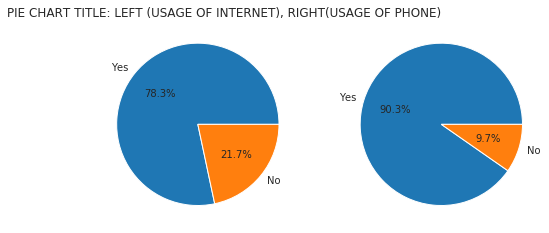

In [53]:
#Plotting percentage of internet/phone use. All records.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4)) #ax1,ax2 refer to your two pies
slices = [len(shares_df) - shares_df.internet_service.isna().sum(), shares_df.internet_service.isna().sum()]
labels = ['Yes', 'No']
ax1.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
slices = [len(shares_df) - shares_df.multiple_lines.isna().sum(), shares_df.multiple_lines.isna().sum()]
labels = ['Yes', 'No']
ax2.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
plt.title("PIE CHART TITLE: LEFT (USAGE OF INTERNET), RIGHT(USAGE OF PHONE)", fontdict={'horizontalalignment': 'right'})
plt.show()

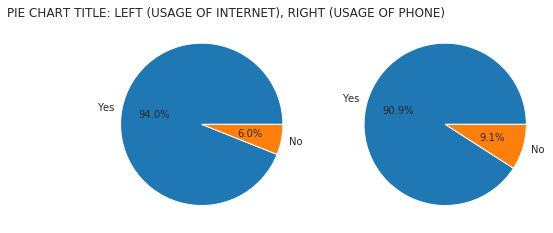

In [54]:
#Plotting percentage of internet/phone use. end_date == YES.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4)) #ax1,ax2 refer to your two pies
slices = [len(shares_df_yes) - shares_df_yes.internet_service.isna().sum(), shares_df_yes.internet_service.isna().sum()]
labels = ['Yes', 'No']
ax1.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
slices = [len(shares_df_yes) - shares_df_yes.multiple_lines.isna().sum(), shares_df_yes.multiple_lines.isna().sum()]
labels = ['Yes', 'No']
ax2.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
plt.title("PIE CHART TITLE: LEFT (USAGE OF INTERNET), RIGHT (USAGE OF PHONE)", fontdict={'horizontalalignment': 'right'})
plt.show()

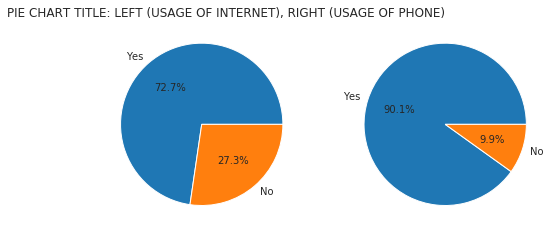

In [55]:
#Plotting percentage of internet/phone use. end_date == NO.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4)) #ax1,ax2 refer to your two pies
slices = [len(shares_df_no) - shares_df_no.internet_service.isna().sum(), shares_df_no.internet_service.isna().sum()]
labels = ['Yes', 'No']
ax1.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
slices = [len(shares_df_no) - shares_df_no.multiple_lines.isna().sum(), shares_df_no.multiple_lines.isna().sum()]
labels = ['Yes', 'No']
ax2.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
plt.title("PIE CHART TITLE: LEFT (USAGE OF INTERNET), RIGHT (USAGE OF PHONE)", fontdict={'horizontalalignment': 'right'})
plt.show()